In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
from scipy.stats import chisquare
from scipy.interpolate import interp1d
from astropy.io import fits
%matplotlib notebook

plt.rcParams['font.family'] = "Times New Roman"

In [ ]:
### Start by just seeing how a GIII star compares to G77

In [5]:
path = "/Users/MasterD/Google Drive/Normalization/output/"

G77 = {"blue": fits.open(path + "g77-61_blue_sum_pynorm.fits"),
       "m1b" : fits.open(path + "g77-61_m1b_otf_cr_sum_pynorm.fits"),
       "m2b" : fits.open(path + "g77-61_m2b_otf_cr_sum_pynorm.fits")}

In [14]:
### Grab that synthetic spectrum

synth = pd.read_csv("/Users/MasterD/Google Drive/Yoon_UMP/synthetic/G77/T4000g5.00z-4.00c+2.50.dat", header=None, sep="\s+")

In [76]:
blue_wl = np.arange(G77['blue'][0].header['CRVAL1'],
                                     G77['blue'][0].header['CRVAL1'] + G77['blue'][0].header['NAXIS1']*G77['blue'][0].header['CD1_1'],
                                     G77['blue'][0].header['CD1_1'])

blue_flux = G77['blue'][0].data

In [70]:
m1b_wl = np.arange(G77['m1b'][0].header['CRVAL1'],
                                     G77['m1b'][0].header['CRVAL1'] + G77['m1b'][0].header['NAXIS1']*G77['m1b'][0].header['CD1_1'],
                                     G77['m1b'][0].header['CD1_1'])

m1b_flux = G77['m1b'][0].data[0]


m2b_wl = np.arange(G77['m2b'][0].header['CRVAL1'],
                                     G77['m2b'][0].header['CRVAL1'] + G77['m2b'][0].header['NAXIS1']*G77['m2b'][0].header['CD1_1'],
                                     G77['m2b'][0].header['CD1_1'])

m2b_flux = G77['m2b'][0].data[0]

<IPython.core.display.Javascript object>


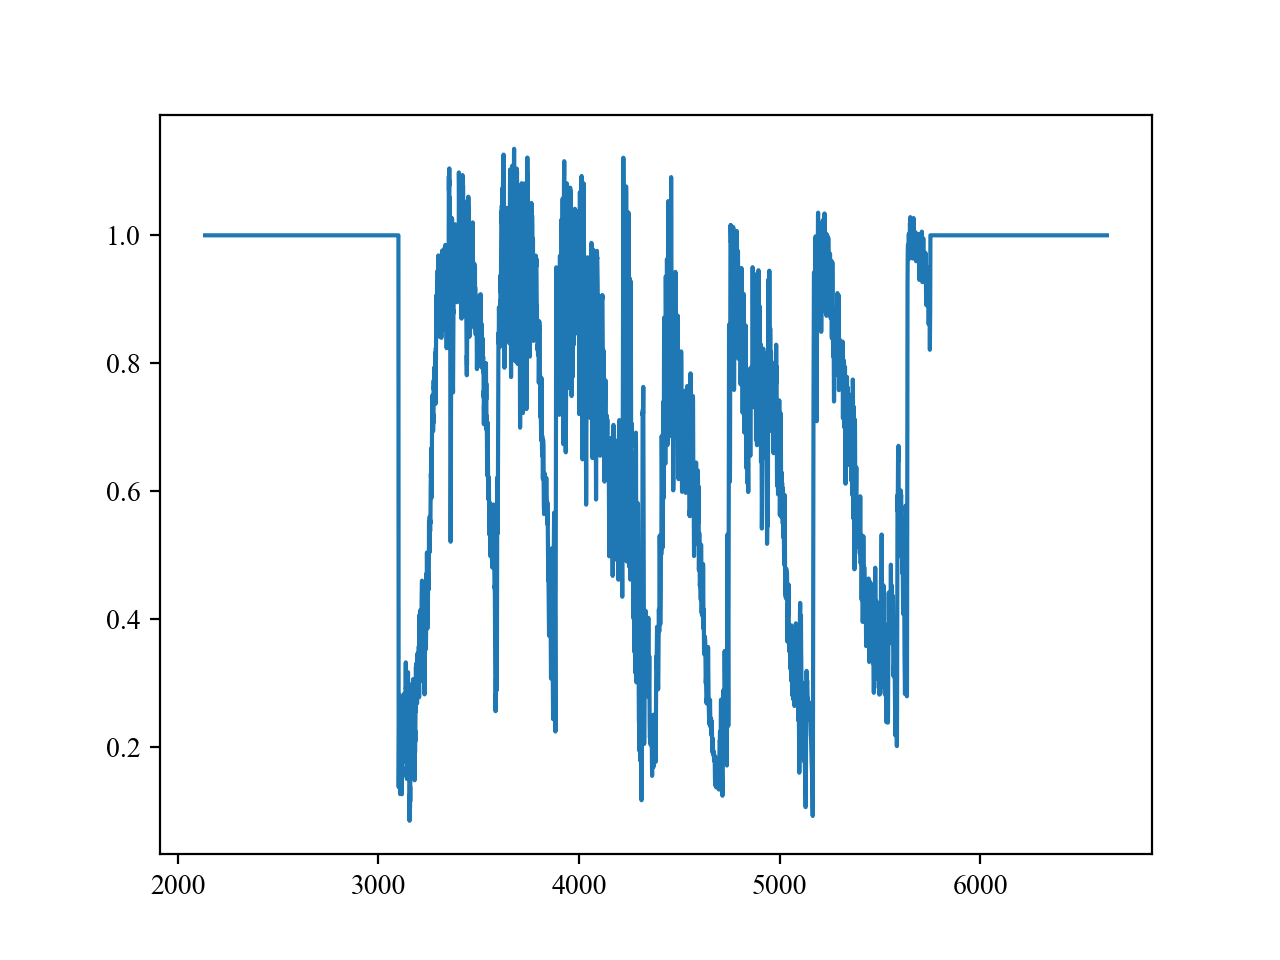

In [79]:
plt.figure()

plt.plot(m2b_wl, m2b_flux)

plt.show()

In [75]:
blue_flux

0.899698683326004

<IPython.core.display.Javascript object>


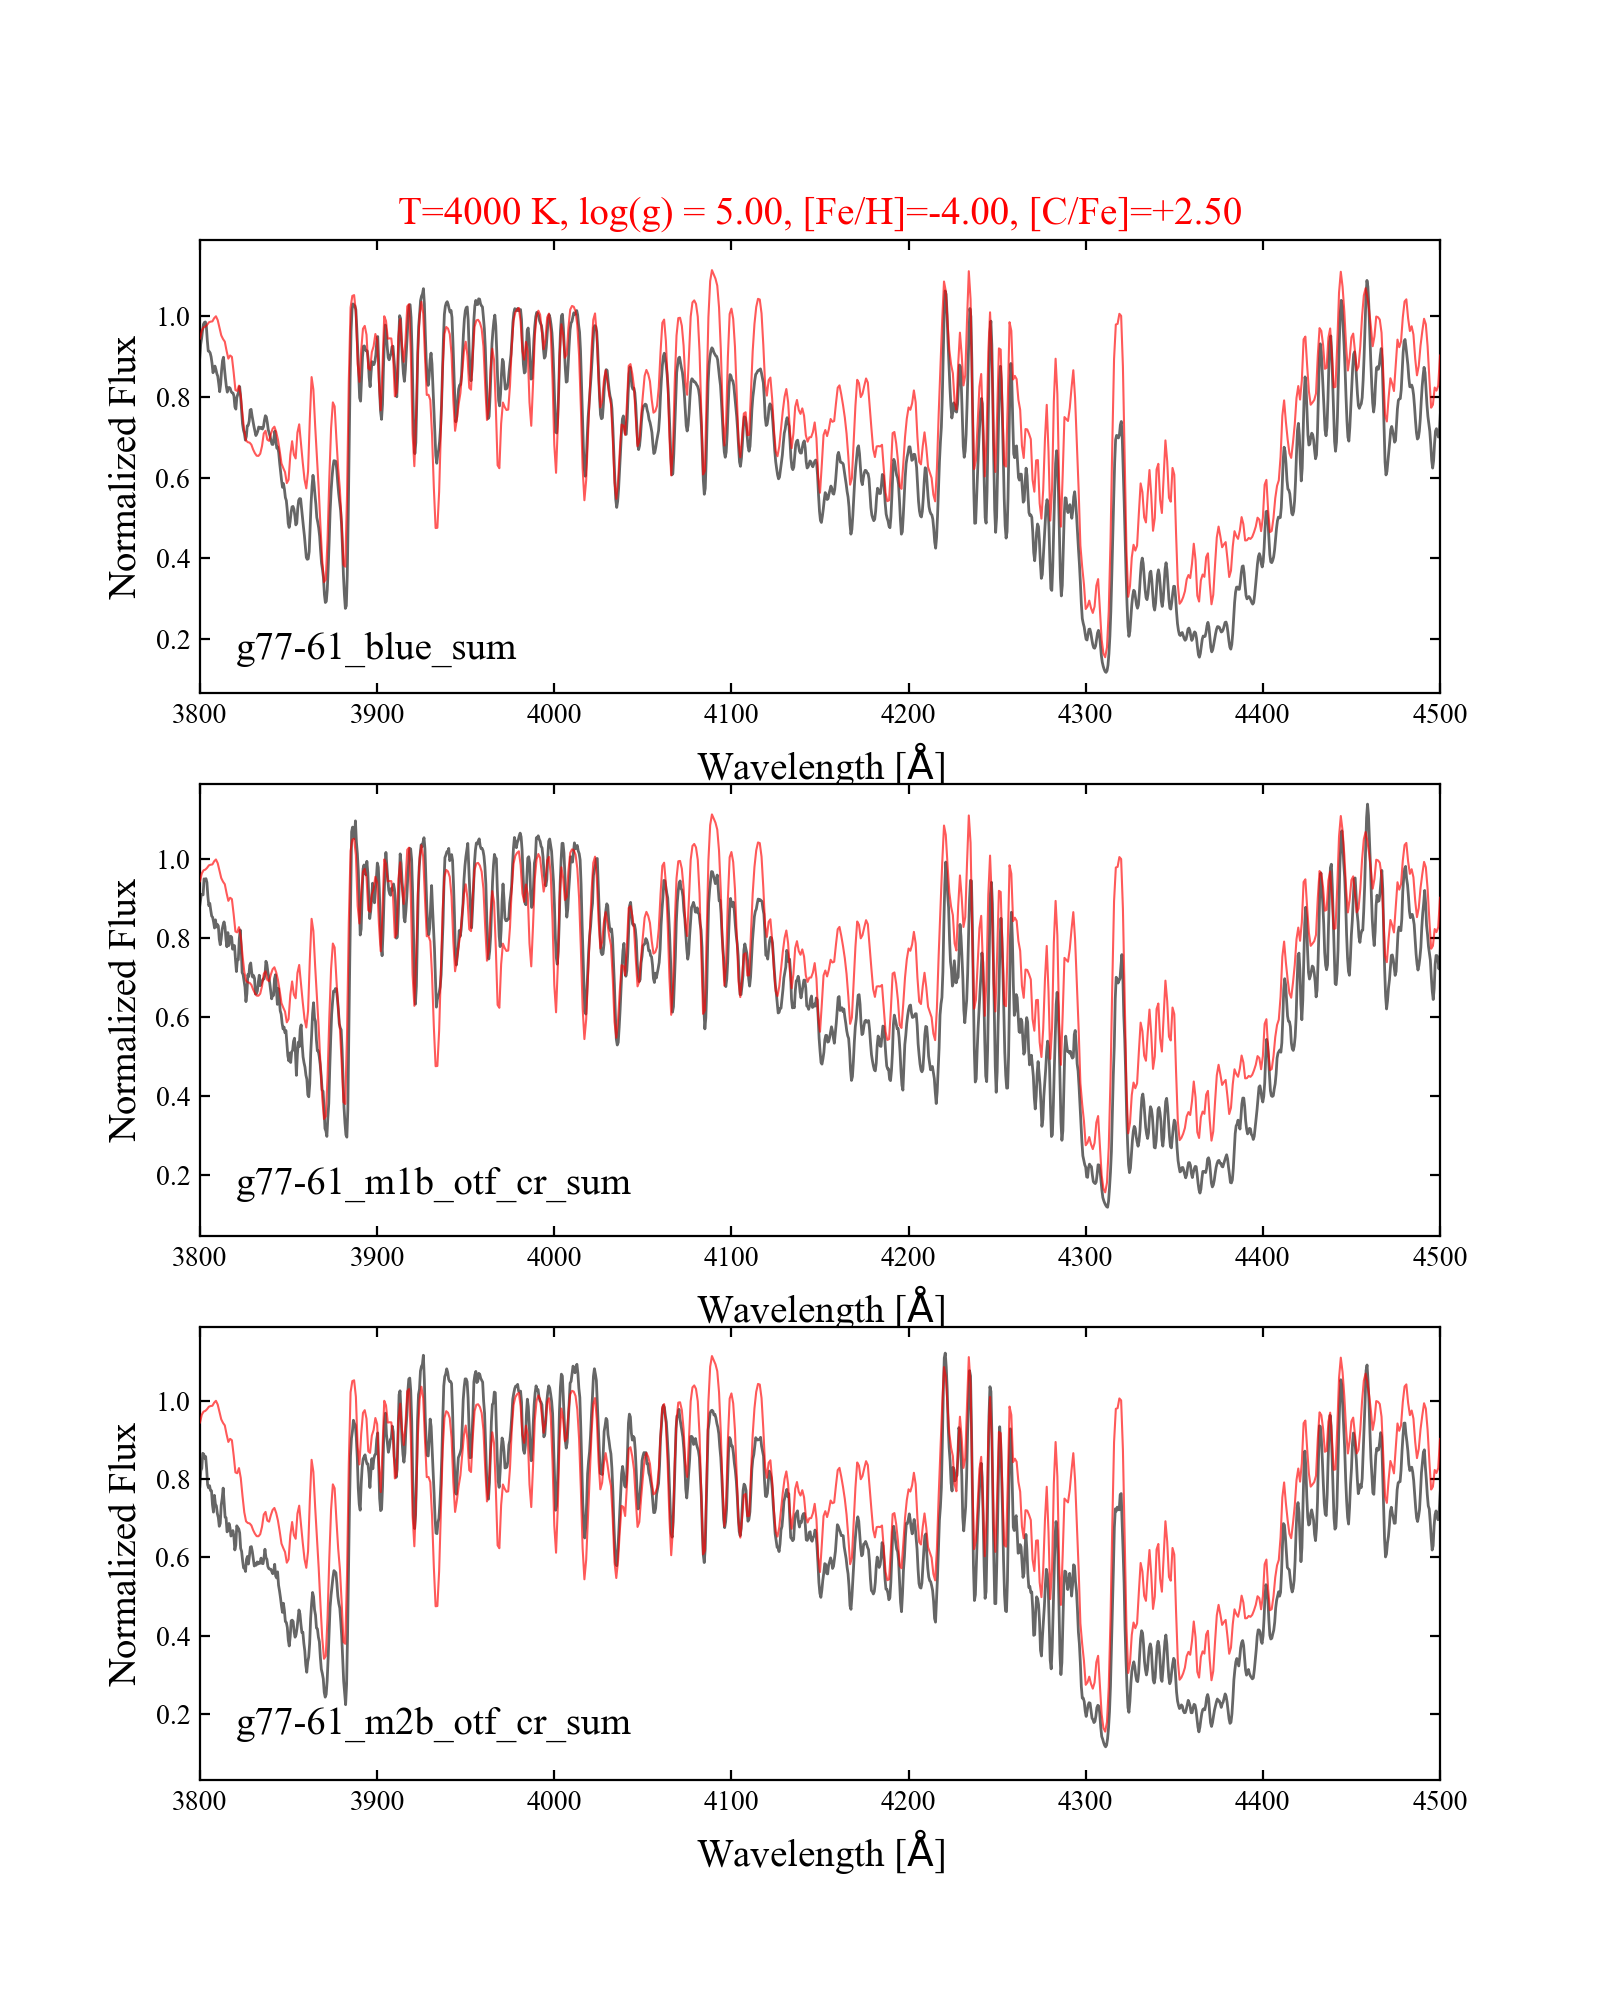

In [112]:
fig, ax = plt.subplots(3,1,figsize=(8,10))


ax[0].plot(blue_wl, blue_flux, color="black", alpha=0.60, linewidth=1)

[label.plot(synth[0][synth[0].between(3800, 4500, inclusive=True)], np.divide(synth[2][synth[0].between(3800, 4500, inclusive=True)], continuum),
        color="red", alpha=0.65, linewidth=0.75, zorder=3) for label in ax]


ax[0].set_title("T=4000 K, log(g) = 5.00, [Fe/H]=-4.00, [C/Fe]=+2.50", color="red", fontsize=14)

ax[1].plot(m1b_wl, m1b_flux, color="black", alpha=0.60, linewidth=1)


ax[2].plot(m2b_wl, m2b_flux, color="black", alpha=0.60, linewidth=1)



ax[0].text(3820, 0.15, "g77-61_blue_sum", fontsize=14)
ax[1].text(3820, 0.15, "g77-61_m1b_otf_cr_sum", fontsize=14)
ax[2].text(3820, 0.15, "g77-61_m2b_otf_cr_sum", fontsize=14)

[label.set_ylabel("Normalized Flux", fontsize=14) for label in ax]
[label.set_xlabel(r"Wavelength [$\rm{\AA}$]", fontsize=14) for label in ax]

[label.tick_params(direction="in", top=True,
                right=True) for label in ax]
[label.set_xlim([3800, 4500]) for label in ax]

plt.savefig("G77_synthetic_plots.pdf", format="pdf")
plt.show()

<IPython.core.display.Javascript object>


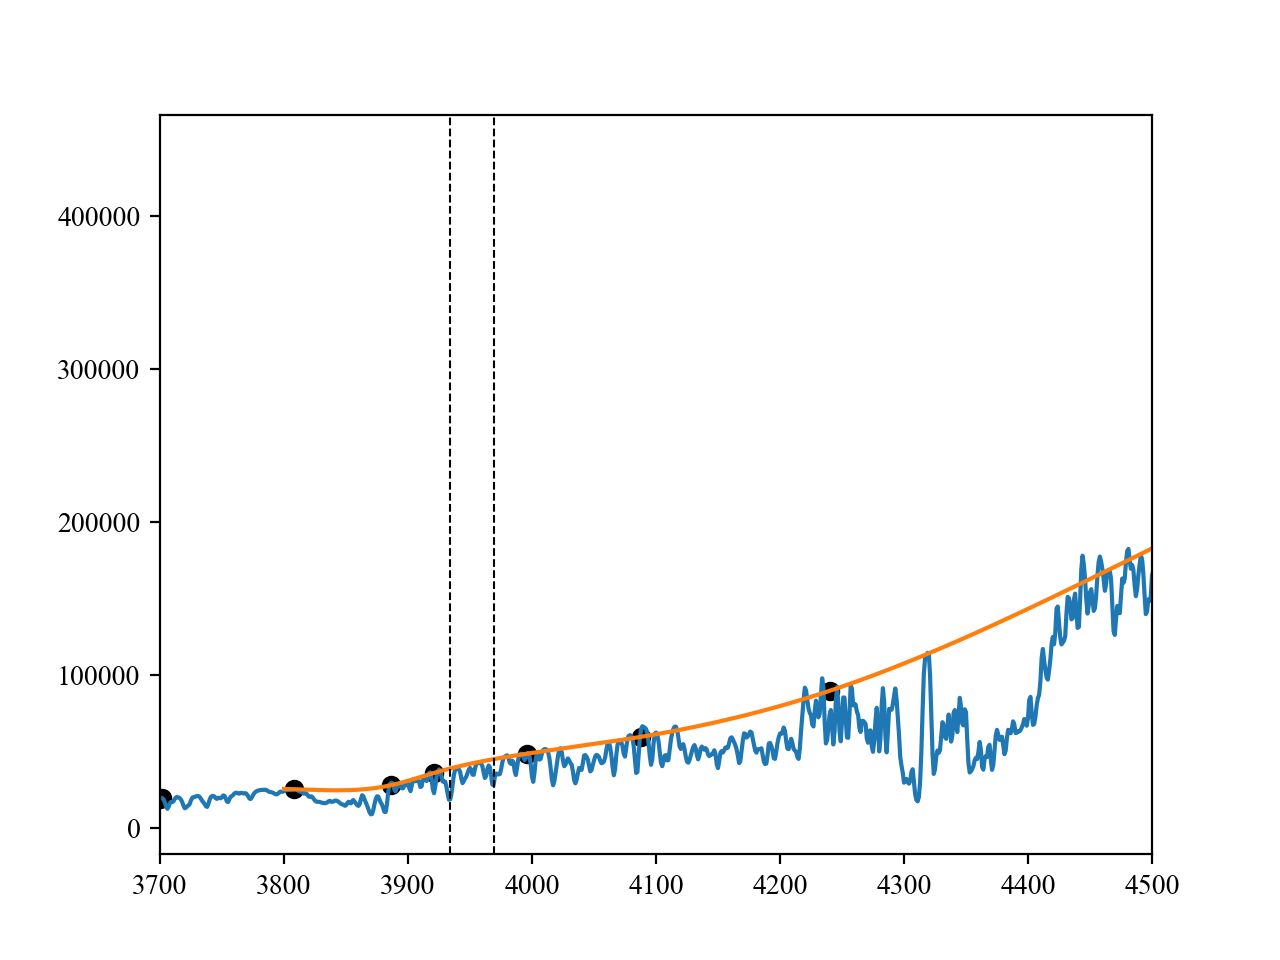

In [72]:
fig = plt.figure()
#plt.plot(wavelength, flux)
plt.plot(synth[0], synth[2])
plt.plot(synth[0][synth[0].between(3800, 4500, inclusive=True)], continuum)
plt.scatter(wave_points, flux_points, color="black")
plt.axvline(3969, linestyle="--", linewidth=0.75, color="black")
plt.axvline(3934, linestyle="--", linewidth=0.75, color="black")
plt.xlim([3700, 4500])
plt.show()

### Chi Square Test

In [103]:
synth_interp = interp1d(synth[0][synth[0].between(3800, 4500, inclusive=True)], np.divide(synth[2][synth[0].between(3800, 4500, inclusive=True)], continuum))


test_flux = blue_flux[(blue_wl > 3800) & (blue_wl < 4500)]
test_wave = blue_wl[(blue_wl > 3800) & (blue_wl < 4500)]
#blue_wl, blue_flux
chisquare(test_flux, synth_interp(test_wave))

Power_divergenceResult(statistic=31.096990707284021, pvalue=1.0)

In [104]:
test_flux - synth_interp(test_wave)

array([-0.0220644 , -0.01740284, -0.00327795, ..., -0.10985726,
       -0.13292028, -0.16117605])

### Renormalization

In [37]:

wave_points = [3700, 3702, 3808, 
               3886, 3921, 3996, 
               4088, 4240, 4572, 
               4763, 4948, 5307, 
               5705, 6314, 6456]

flux_points = [18879, 19240, 25136, 
               27701, 35841, 48406, 
               59415, 89501, 211155, 
               275252, 313187, 377284, 
               417835, 438764, 432224]

tck = interp.splrep(wave_points, flux_points)

continuum = interp.splev(synth[0][synth[0].between(3800, 4500, inclusive=True)], tck)

In [31]:
continuum

array([  25226.06975057,   25216.30477556,   25206.05615953,
         25195.35233101,   25184.22171854,   25172.69275067,
         25160.79385593,   25148.55346286,   25136.        ,
         25123.16880777,   25110.12287415,   25096.93209898,
         25083.66638213,   25070.39562344,   25057.18972278,
         25044.11858001,   25031.25209496,   25018.66016751,
         25006.41269751,   24994.57958481,   24983.23072927,
         24972.43603074,   24962.26538908,   24952.78870414,
         24944.07587579,   24936.19680387,   24929.22138824,
         24923.21952876,   24918.26112528,   24914.41607766,
         24911.75428576,   24910.34564942,   24910.26006851,
         24911.56744287,   24914.33767238,   24918.64065687,
         24924.54629621,   24932.12449025,   24941.44513885,
         24952.57814187,   24965.59339915,   24980.56081056,
         24997.55027594,   25016.63169516,   25037.87496808,
         25061.34999454,   25087.1266744 ,   25115.27490752,
         25145.86459375,